In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
display(df.head())
df.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
missing_values = df.isnull().sum()
display(missing_values)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
numerical_df = df.select_dtypes(include=np.number)
display(numerical_df.describe())

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"Value counts for column: {col}")
    display(df[col].value_counts())

Value counts for column: sex


,count
sex,
Male,718
Female,190


Value counts for column: cp


,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


Value counts for column: fbs


,count
fbs,
False,723
True,185


Value counts for column: restecg


,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


Value counts for column: exang


,count
exang,
FALSE,535
TRUE,337
TURE,36


Value counts for column: slope


,count
slope,
flat,453
upsloping,298
downsloping,157


Value counts for column: thal


,count
thal,
reversable defect,363
normal,345
fixed defect,200


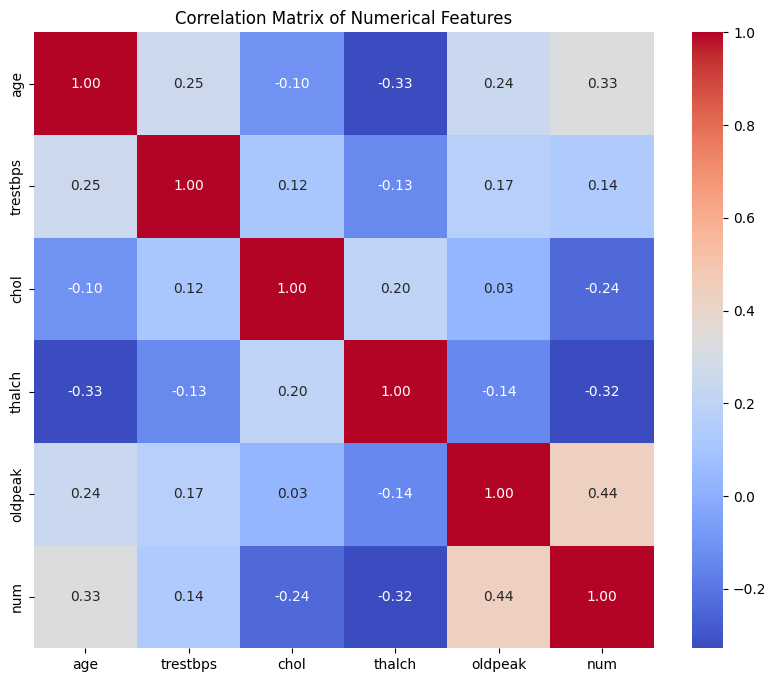

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [10]:
display(df.head())
df.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


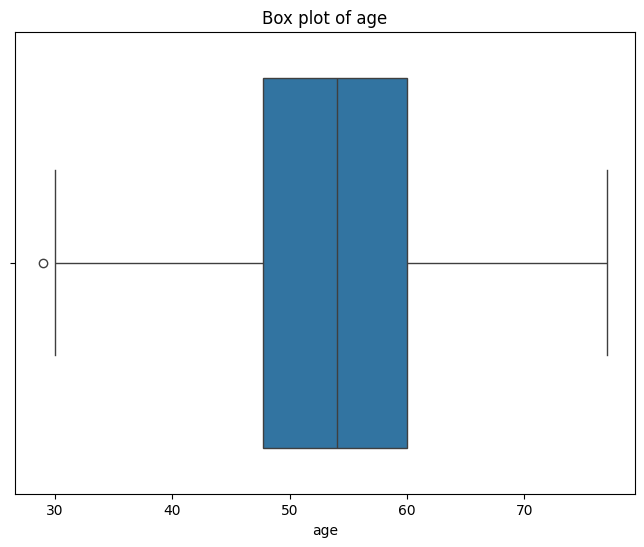

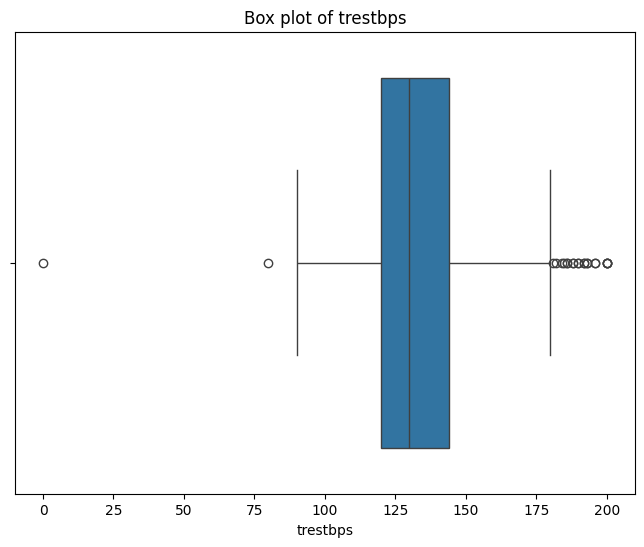

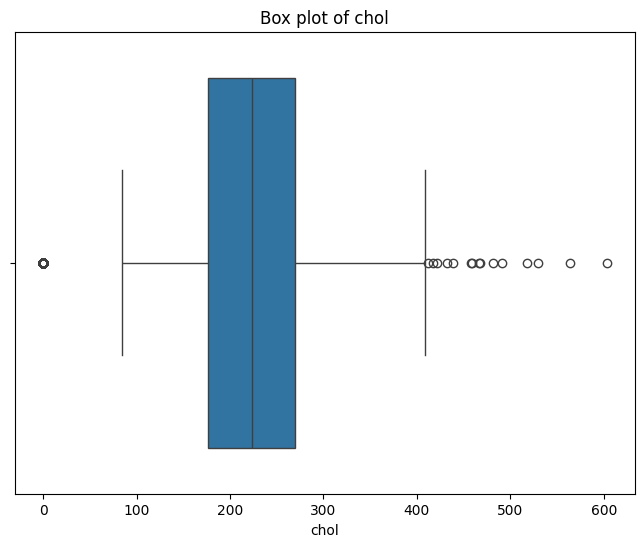

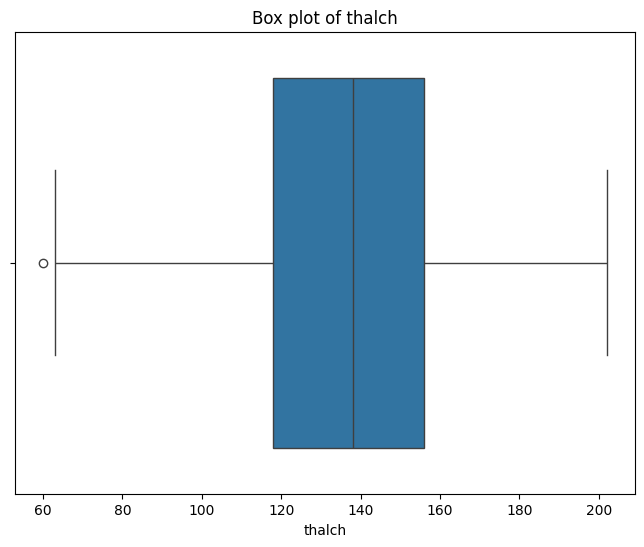

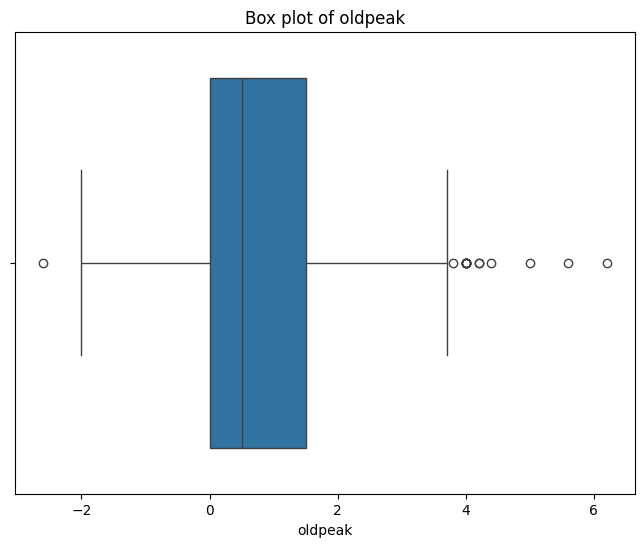

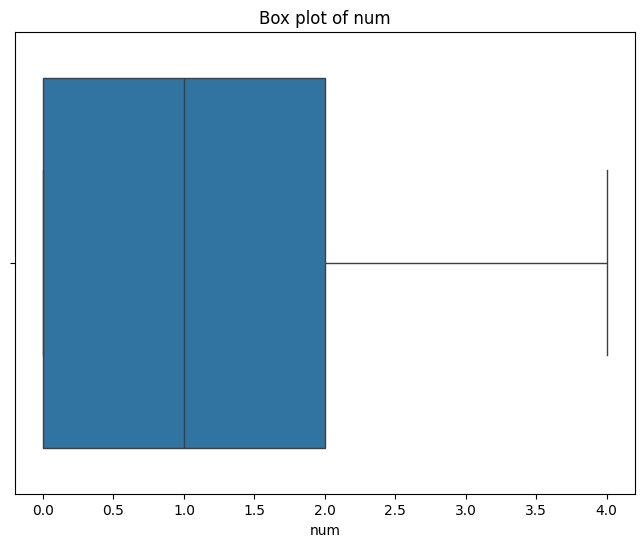

Value counts for column: sex


,count
sex,
Male,718
Female,190


Value counts for column: cp


,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


Value counts for column: fbs


,count
fbs,
False,723
True,185


Value counts for column: restecg


,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


Value counts for column: exang


,count
exang,
FALSE,535
TRUE,337
TURE,36


Value counts for column: slope


,count
slope,
flat,453
upsloping,298
downsloping,157


Value counts for column: thal


,count
thal,
reversable defect,363
normal,345
fixed defect,200


In [11]:
for col in numerical_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

for col in categorical_cols:
    print(f"Value counts for column: {col}")
    display(df[col].value_counts())

In [12]:
display(numerical_df.describe())

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


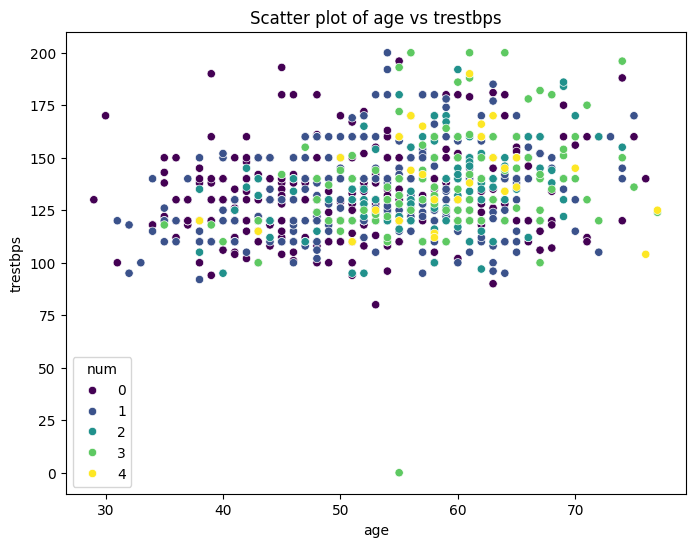

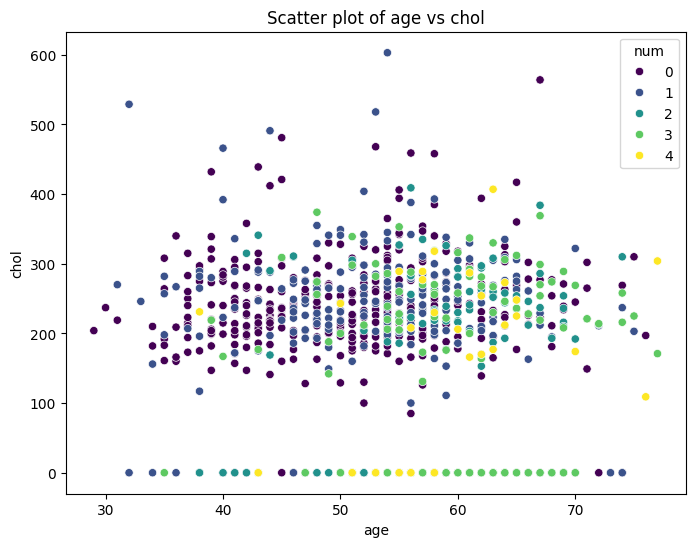

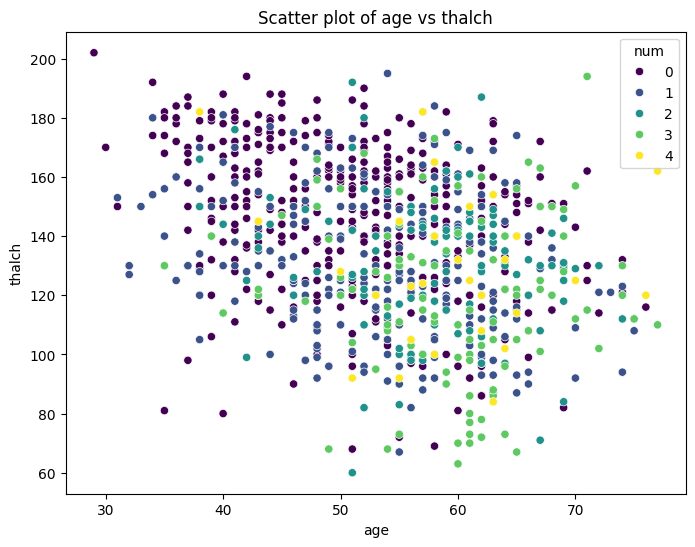

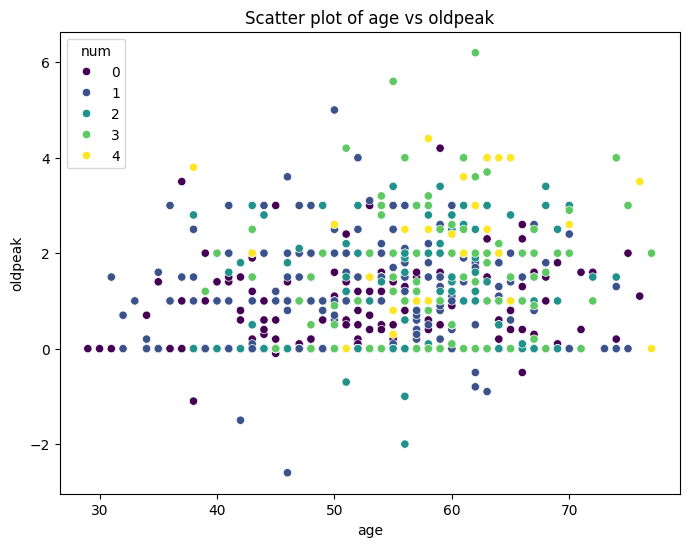

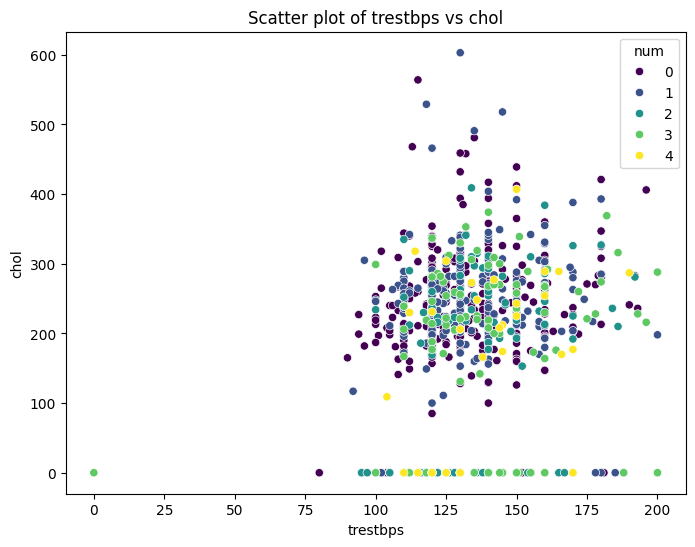

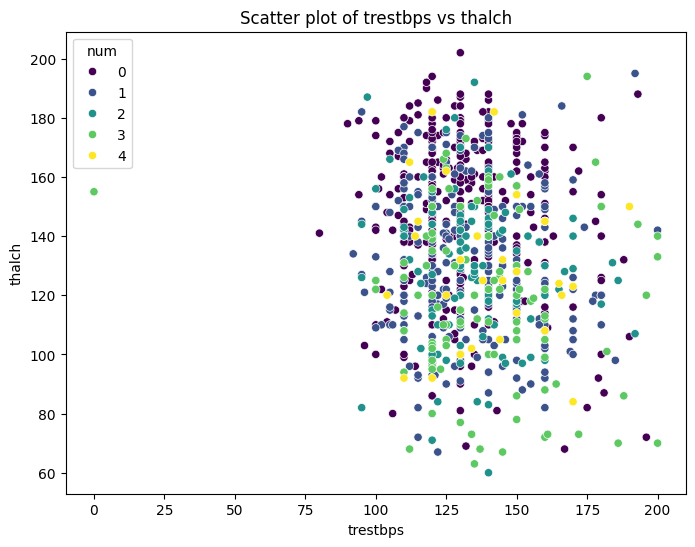

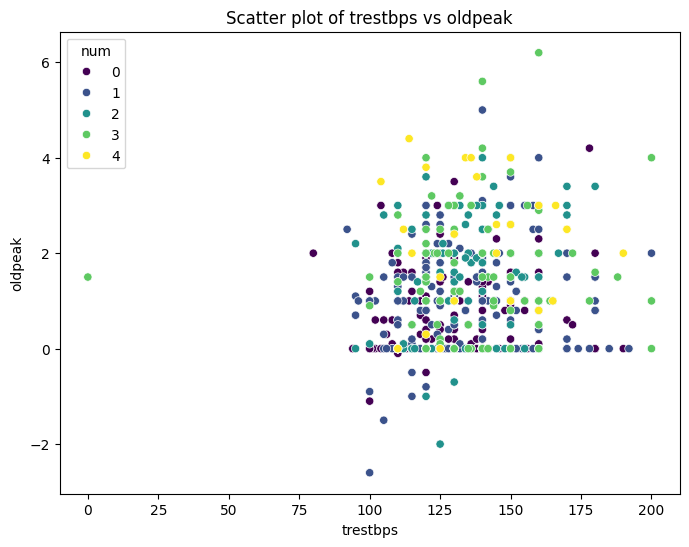

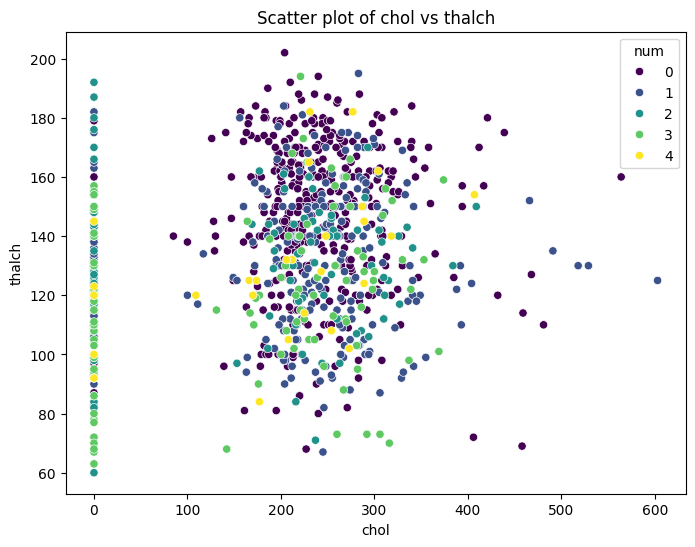

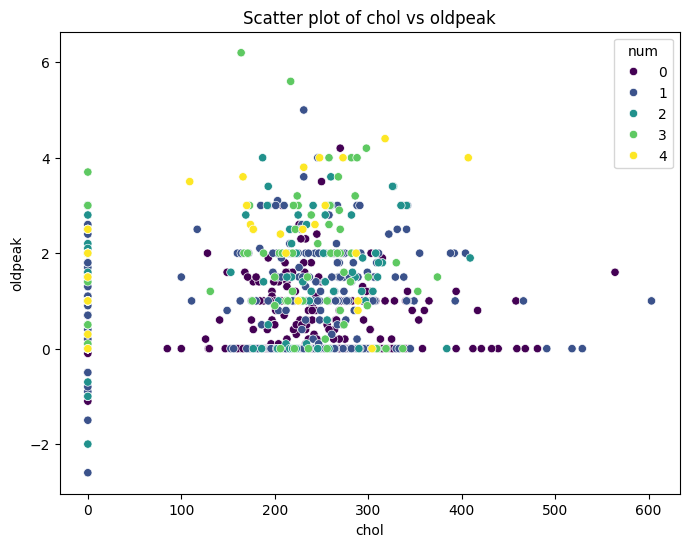

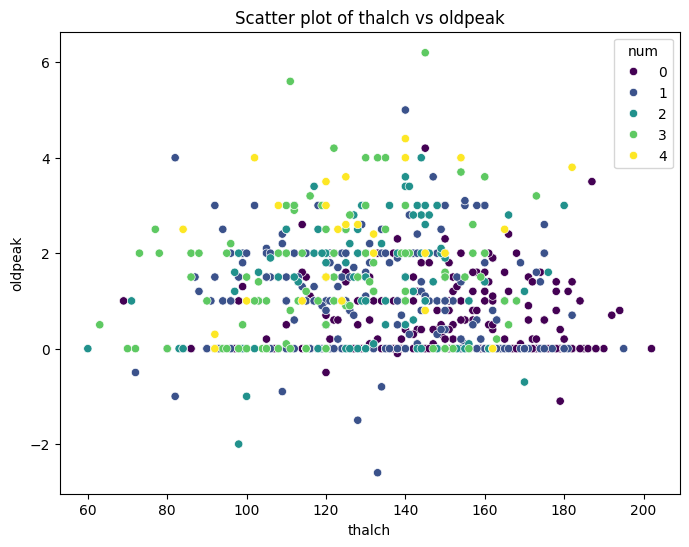

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


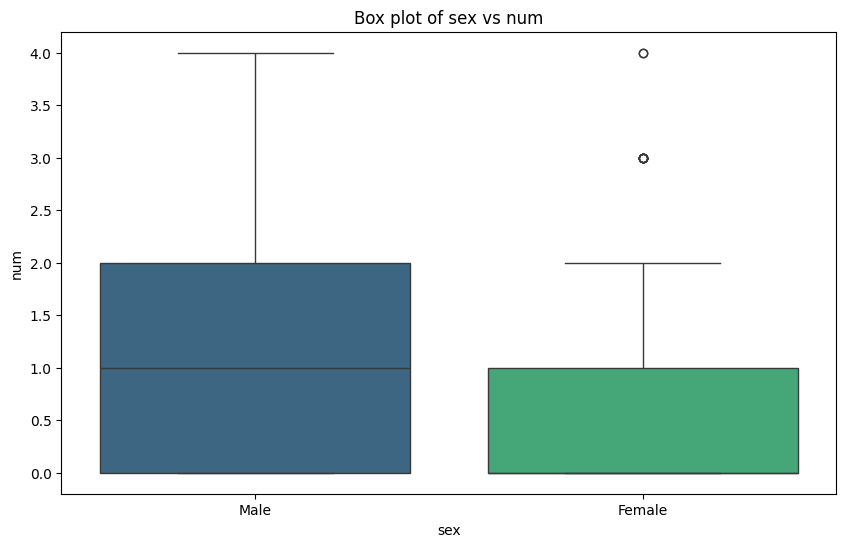

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


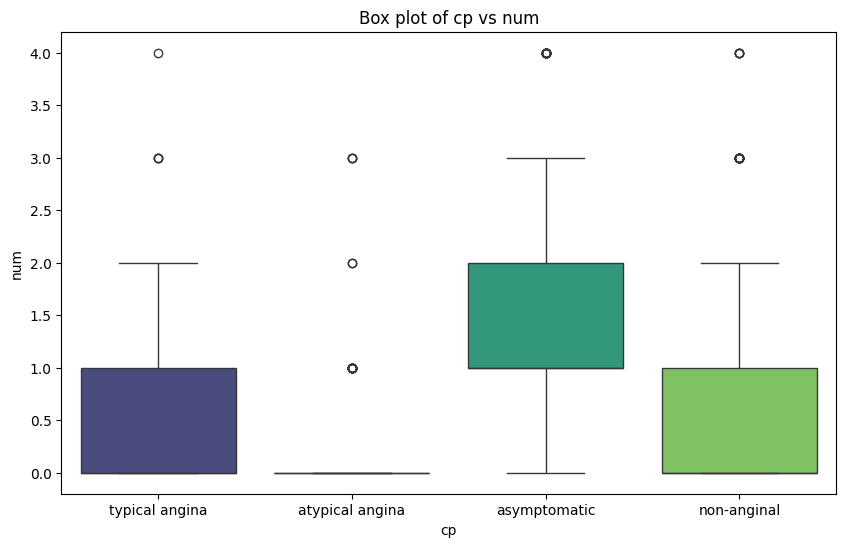

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


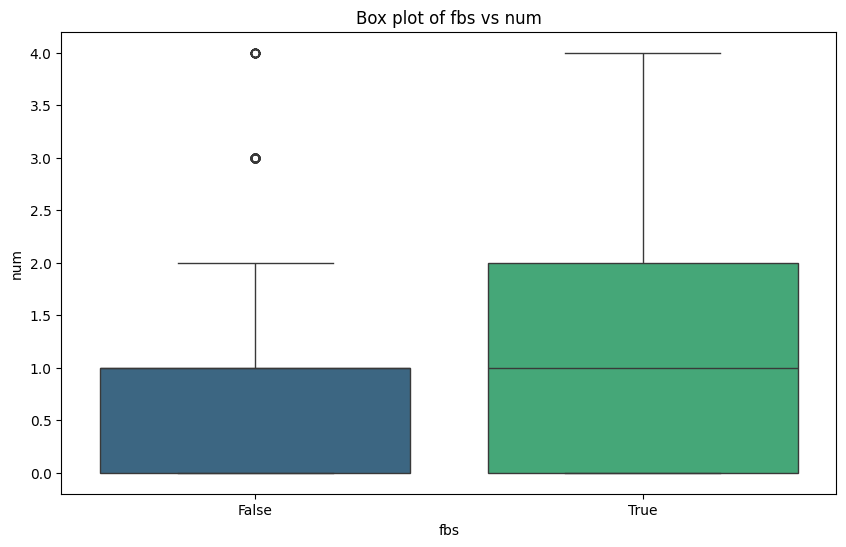

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


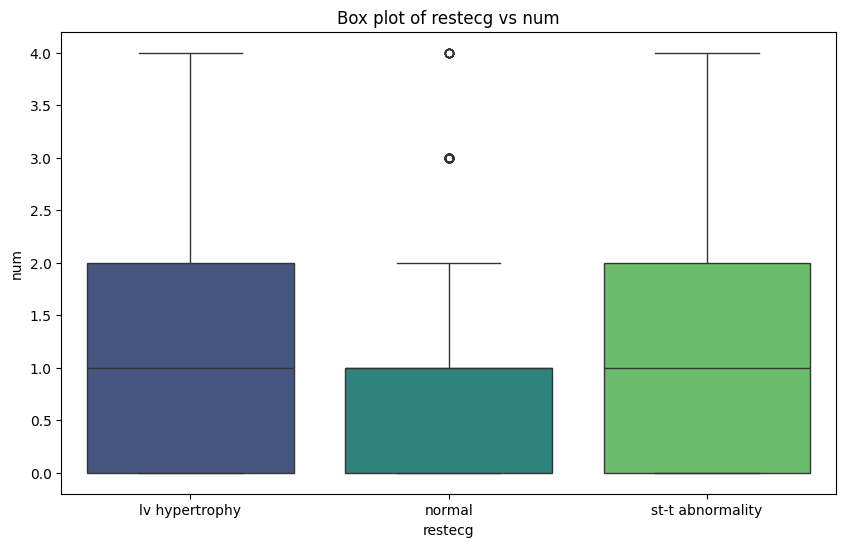

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


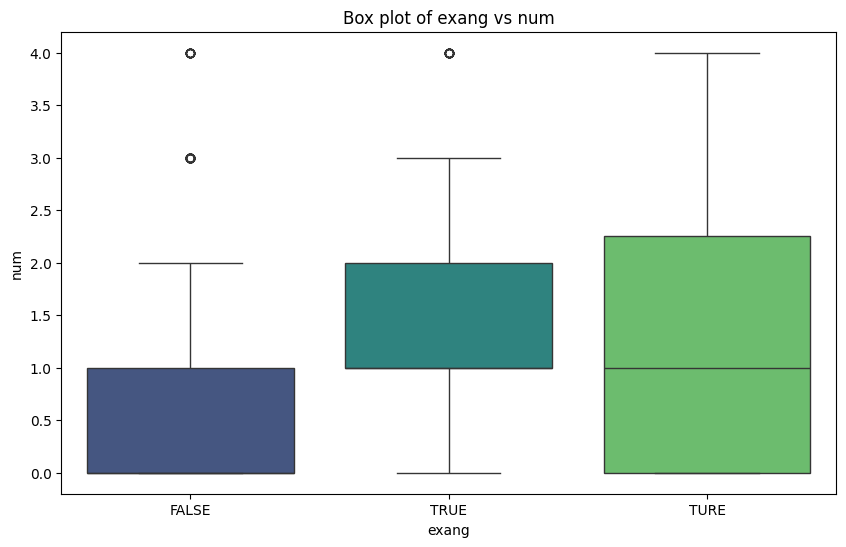

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


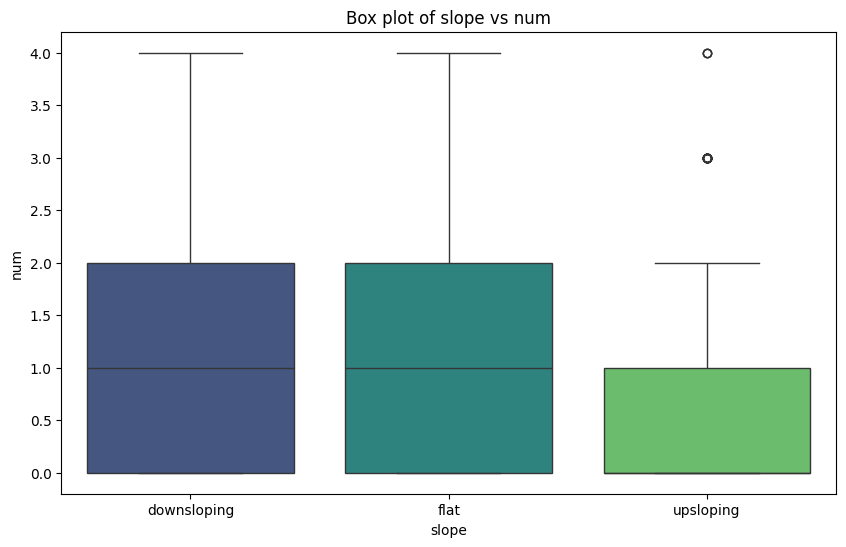

/tmp/ipython-input-538860781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='num', palette='viridis')


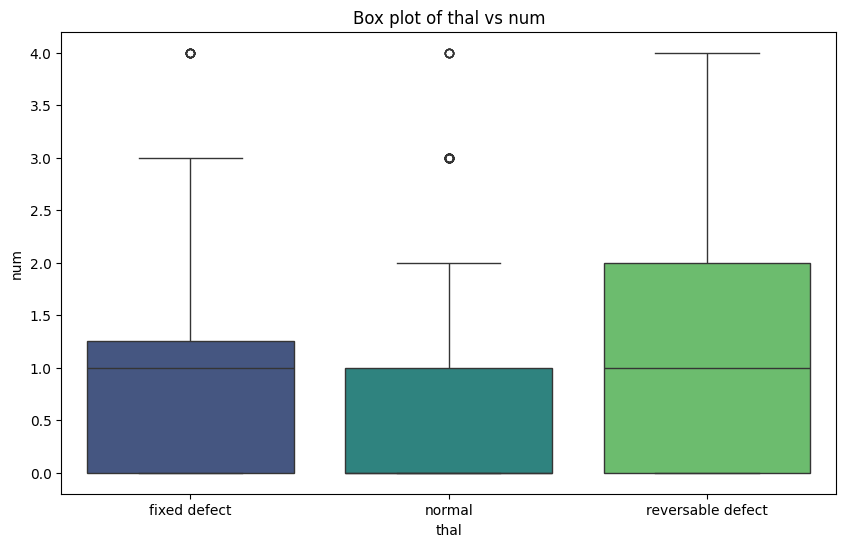

In [13]:
# Scatter plots for numerical features
numerical_cols_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for i in range(len(numerical_cols_to_plot)):
    for j in range(i + 1, len(numerical_cols_to_plot)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=numerical_cols_to_plot[i], y=numerical_cols_to_plot[j], hue='num', palette='viridis')
        plt.title(f'Scatter plot of {numerical_cols_to_plot[i]} vs {numerical_cols_to_plot[j]}')
        plt.xlabel(numerical_cols_to_plot[i])
        plt.ylabel(numerical_cols_to_plot[j])
        plt.show()

# Box plots for categorical features against the target variable
categorical_cols_to_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='num', palette='viridis')
    plt.title(f'Box plot of {col} vs num')
    plt.xlabel(col)
    plt.ylabel('num')
    plt.show()

In [14]:
for col in categorical_cols:
    print(f"Value counts for column: {col}")
    display(df[col].value_counts())

Value counts for column: sex


,count
sex,
Male,718
Female,190


Value counts for column: cp


,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


Value counts for column: fbs


,count
fbs,
False,723
True,185


Value counts for column: restecg


,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


Value counts for column: exang


,count
exang,
FALSE,535
TRUE,337
TURE,36


Value counts for column: slope


,count
slope,
flat,453
upsloping,298
downsloping,157


Value counts for column: thal


,count
thal,
reversable defect,363
normal,345
fixed defect,200


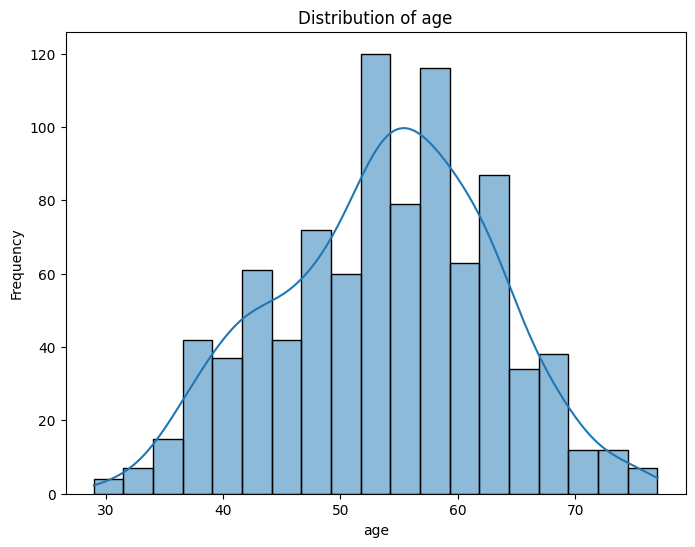

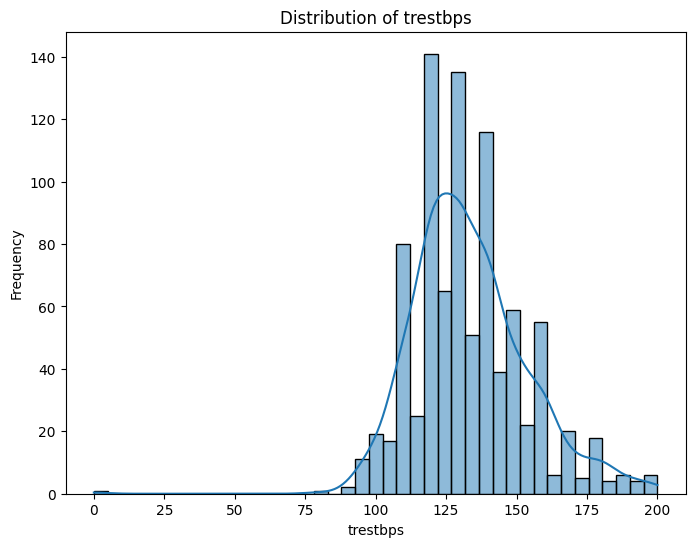

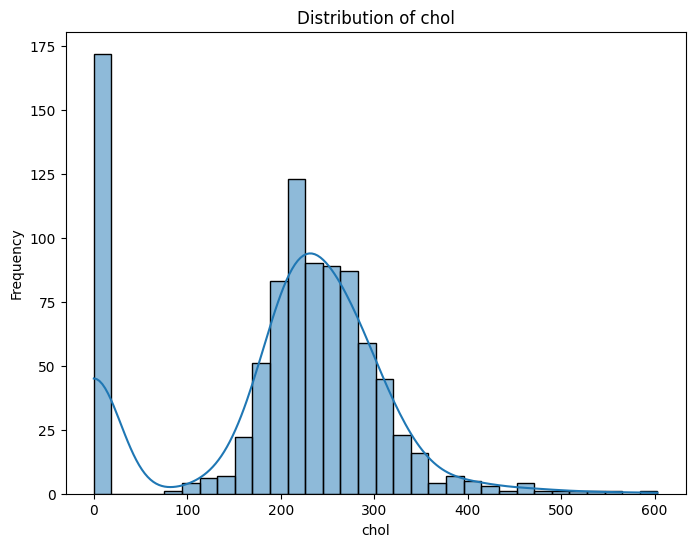

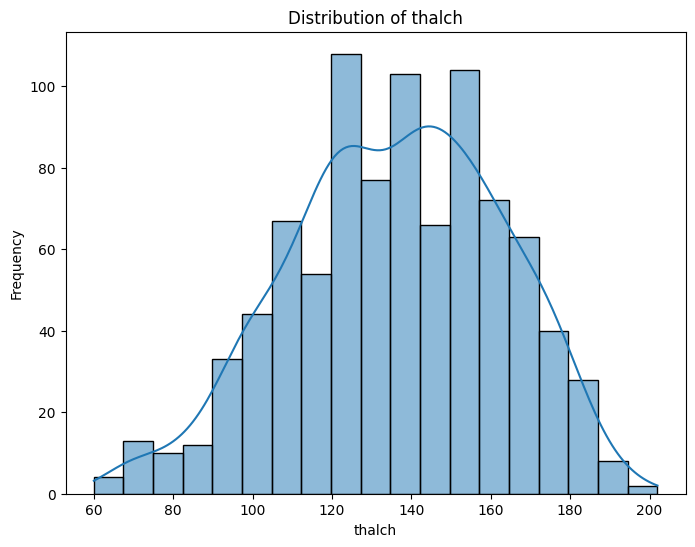

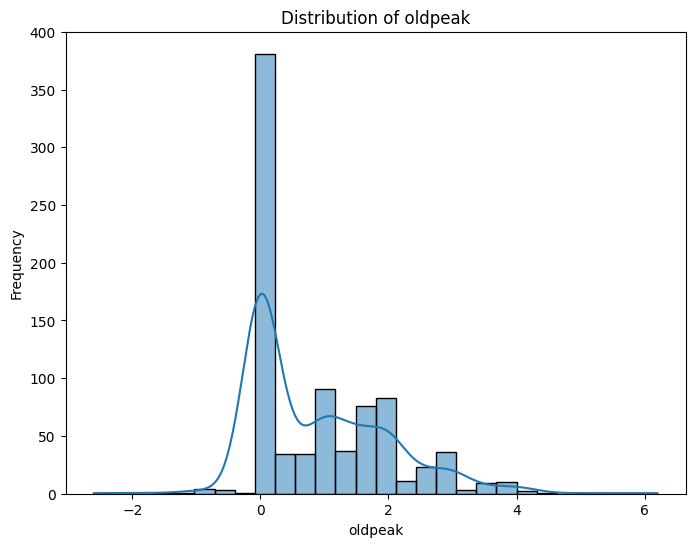

In [15]:
# Fix inconsistency in 'exang' column
df['exang'] = df['exang'].replace('TURE', 'TRUE')

# Generate histograms for numerical features
numerical_cols_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
oldpeak_median = df['oldpeak'].median()
df['oldpeak'].fillna(oldpeak_median, inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-2339750739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(oldpeak_median, inplace=True)


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (726, 17)
Shape of X_test: (182, 17)
Shape of y_train: (726,)
Shape of y_test: (182,)


In [18]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())
df_encoded.info()

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_TRUE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,True,False,False,True,True,False,False,False,False,False,False,False
1,41,135,203,132,0.0,0,True,True,False,False,False,True,False,False,True,False,False,False
2,57,140,192,148,0.4,0,True,False,False,False,False,True,False,False,True,False,False,False
3,52,118,186,190,0.0,0,True,False,False,True,False,False,False,False,True,False,False,False
4,57,110,201,126,1.5,0,True,False,False,False,False,True,False,True,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   thalch                    908 non-null    int64  
 4   oldpeak                   908 non-null    float64
 5   num                       908 non-null    int64  
 6   sex_Male                  908 non-null    bool   
 7   cp_atypical angina        908 non-null    bool   
 8   cp_non-anginal            908 non-null    bool   
 9   cp_typical angina         908 non-null    bool   
 10  fbs_True                  908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_TRUE                908 non-null    bool   
 14  slope_flat

In [36]:
from sklearn.preprocessing import StandardScaler

numerical_cols_encoded = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'num' in numerical_cols_encoded:
    numerical_cols_encoded.remove('num') # Exclude the target variable from scaling

scaler = StandardScaler()
df_encoded[numerical_cols_encoded] = scaler.fit_transform(df_encoded[numerical_cols_encoded])

# Explicitly convert 'num' column to integer type for classification
df_encoded['num'] = df_encoded['num'].astype(int)

display(df_encoded.head())
display(df_encoded.info())

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_TRUE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,0.524183,1.354403,0,True,False,False,True,True,False,False,False,False,False,False,False
1,-1.397560,0.076967,0.013526,-0.147705,-0.815718,0,True,True,False,False,False,True,False,False,True,False,False,False
2,0.350503,0.322181,-0.084656,0.449529,-0.438305,0,True,False,False,False,False,True,False,False,True,False,False,False
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815718,0,True,False,False,True,False,False,False,False,True,False,False,False
4,0.350503,-1.149102,-0.004325,-0.371668,0.599578,0,True,False,False,False,False,True,False,True,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    float64
 1   trestbps                  908 non-null    float64
 2   chol                      908 non-null    float64
 3   thalch                    908 non-null    float64
 4   oldpeak                   908 non-null    float64
 5   num                       908 non-null    int64  
 6   sex_Male                  908 non-null    bool   
 7   cp_atypical angina        908 non-null    bool   
 8   cp_non-anginal            908 non-null    bool   
 9   cp_typical angina         908 non-null    bool   
 10  fbs_True                  908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_TRUE                908 non-null    bool   
 14  slope_flat

None

In [24]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (726, 17)
Shape of X_test: (182, 17)
Shape of y_train: (726,)
Shape of y_test: (182,)


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)



In [37]:
# Split the data into training and testing sets again
from sklearn.model_selection import train_test_split

X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (726, 17)
Shape of X_test: (182, 17)
Shape of y_train: (726,)
Shape of y_test: (182,)


In [38]:
# Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

print("Decision Tree Model trained successfully!")

Decision Tree Model trained successfully!


In [45]:
y_pred_train_proba = dt_model.predict_proba(X_train)
y_pred_test_proba = dt_model.predict_proba(X_test)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(y_train,y_pred_train)
test_accuracy  = accuracy_score(y_test,y_pred_test)
training_loss  = log_loss(y_train,y_pred_train_proba)
test_loss  = log_loss(y_test,y_pred_test_proba)

print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Training Loss: {training_loss:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.74
Training Loss: 0.00
Test Loss: 9.31


In [47]:
training_accracy = []
test_accuracy = []
training_loss = []
test_loss = []



In [50]:
for i in range(1, 501):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=i, stratify=y)
    model = DecisionTreeClassifier(criterion='gini', max_depth=7) # 'entropy'
    model.fit(X_train,y_train)
    y_pred_train_proba = model.predict_proba(X_train)
    y_pred_test_proba  = model.predict_proba(X_test)
    y_pred_train = model.predict(X_train) # Keep this for accuracy calculation
    y_pred_test  = model.predict(X_test) # Keep this for accuracy calculation
    training_accracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    training_loss.append(log_loss(y_train,y_pred_train_proba))
    test_loss.append(log_loss(y_test,y_pred_test_proba))

In [51]:
print("Cross validation: Training accuracy score:", np.round(np.mean(training_accracy),2))
print("Cross validation: Test accuracy score:", np.round(np.mean(test_accuracy),2))
print("Cross validation: trianing loss:", np.round(np.mean(training_loss),2))
print("Cross validation: test loss:", np.round(np.mean(test_loss),2))




Cross validation: Training accuracy score: 0.92
Cross validation: Test accuracy score: 0.82
Cross validation: trianing loss: 0.21
Cross validation: test loss: 3.71


In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# For multiclass classification, we need to binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_test_proba = dt_model.predict_proba(X_test)

# Calculate ROC AUC for each class
roc_auc_scores = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_test_proba[:, i])
    roc_auc_scores[f'Class {i}'] = roc_auc

print("ROC AUC Scores per class:")
display(roc_auc_scores)

# Calculate macro-average ROC AUC
macro_roc_auc = roc_auc_score(y_test, y_pred_test_proba, multi_class='ovo', average='macro')
print(f"\nMacro Average ROC AUC: {macro_roc_auc:.2f}")

ROC AUC Scores per class:


{'Class 0': np.float64(0.9418629100084105),
 'Class 1': np.float64(0.9167531120331951),
 'Class 2': np.float64(0.8257575757575757)}


Macro Average ROC AUC: 0.87


In [53]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 21)),
    'min_samples_split': [2, 5, 10, 20, 0.1, 0.2, 0.5]
}

print(param_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 5, 10, 20, 0.1, 0.2, 0.5]}


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

In [55]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters found by GridSearchCV:")
print(best_params)

Best Parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 0.2}


In [56]:
from sklearn.metrics import accuracy_score, log_loss

# Initialize a new Decision Tree Classifier using the best_params
tuned_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the new model
tuned_dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_proba_tuned = tuned_dt_model.predict_proba(X_test)
y_pred_test_tuned = tuned_dt_model.predict(X_test)

# Calculate accuracy and log loss for the tuned model on the test data
test_accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)
test_loss_tuned = log_loss(y_test, y_pred_test_proba_tuned)

# Print the calculated test accuracy and test loss
print(f"Tuned Model Test Accuracy: {test_accuracy_tuned:.2f}")
print(f"Tuned Model Test Loss: {test_loss_tuned:.2f}")

Tuned Model Test Accuracy: 0.85
Tuned Model Test Loss: 0.61


In [58]:
print("Initial Model Performance (Cross-Validation Mean):")
print(f"Test Accuracy: {np.mean(test_accuracy):.2f}")
print(f"Test Loss: {np.mean(test_loss):.2f}")

print("\nTuned Model Performance:")
print(f"Test Accuracy: {test_accuracy_tuned:.2f}")
print(f"Test Loss: {test_loss_tuned:.2f}")

print("\nImpact of Hyperparameter Tuning:")
if test_accuracy_tuned > np.mean(test_accuracy):
    print("Hyperparameter tuning improved the test accuracy.")
elif test_accuracy_tuned < np.mean(test_accuracy):
    print("Hyperparameter tuning decreased the test accuracy.")
else:
    print("Hyperparameter tuning did not change the test accuracy.")

if test_loss_tuned < np.mean(test_loss):
    print("Hyperparameter tuning reduced the test loss, which indicates better model performance.")
elif test_loss_tuned > np.mean(test_loss):
    print("Hyperparameter tuning increased the test loss, which indicates worse model performance.")
else:
    print("Hyperparameter tuning did not change the test loss.")

print("\nSummary:")
print("Hyperparameter tuning aimed to find a better balance between bias and variance.")
if test_accuracy_tuned > np.mean(test_accuracy) and test_loss_tuned < np.mean(test_loss):
    print("The tuning successfully improved both accuracy and reduced loss on the test set, suggesting a better generalization to unseen data and a reduction in overfitting compared to the initial model.")
elif test_accuracy_tuned < np.mean(test_accuracy) and test_loss_tuned > np.mean(test_loss):
    print("The tuning resulted in lower accuracy and higher loss on the test set, which might indicate that the initial model generalized better or that the hyperparameter search did not find optimal values for this dataset.")
else:
    print("The tuning resulted in a mix of improved/worsened metrics, or no significant change, indicating that while some parameters were adjusted, the overall impact on test performance was not a clear improvement. This could happen if the initial parameters were already close to optimal or if the dataset complexity limits further performance gains.")

Initial Model Performance (Cross-Validation Mean):
Test Accuracy: 0.82
Test Loss: 3.71

Tuned Model Performance:
Test Accuracy: 0.85
Test Loss: 0.61

Impact of Hyperparameter Tuning:
Hyperparameter tuning improved the test accuracy.
Hyperparameter tuning reduced the test loss, which indicates better model performance.

Summary:
Hyperparameter tuning aimed to find a better balance between bias and variance.
The tuning successfully improved both accuracy and reduced loss on the test set, suggesting a better generalization to unseen data and a reduction in overfitting compared to the initial model.


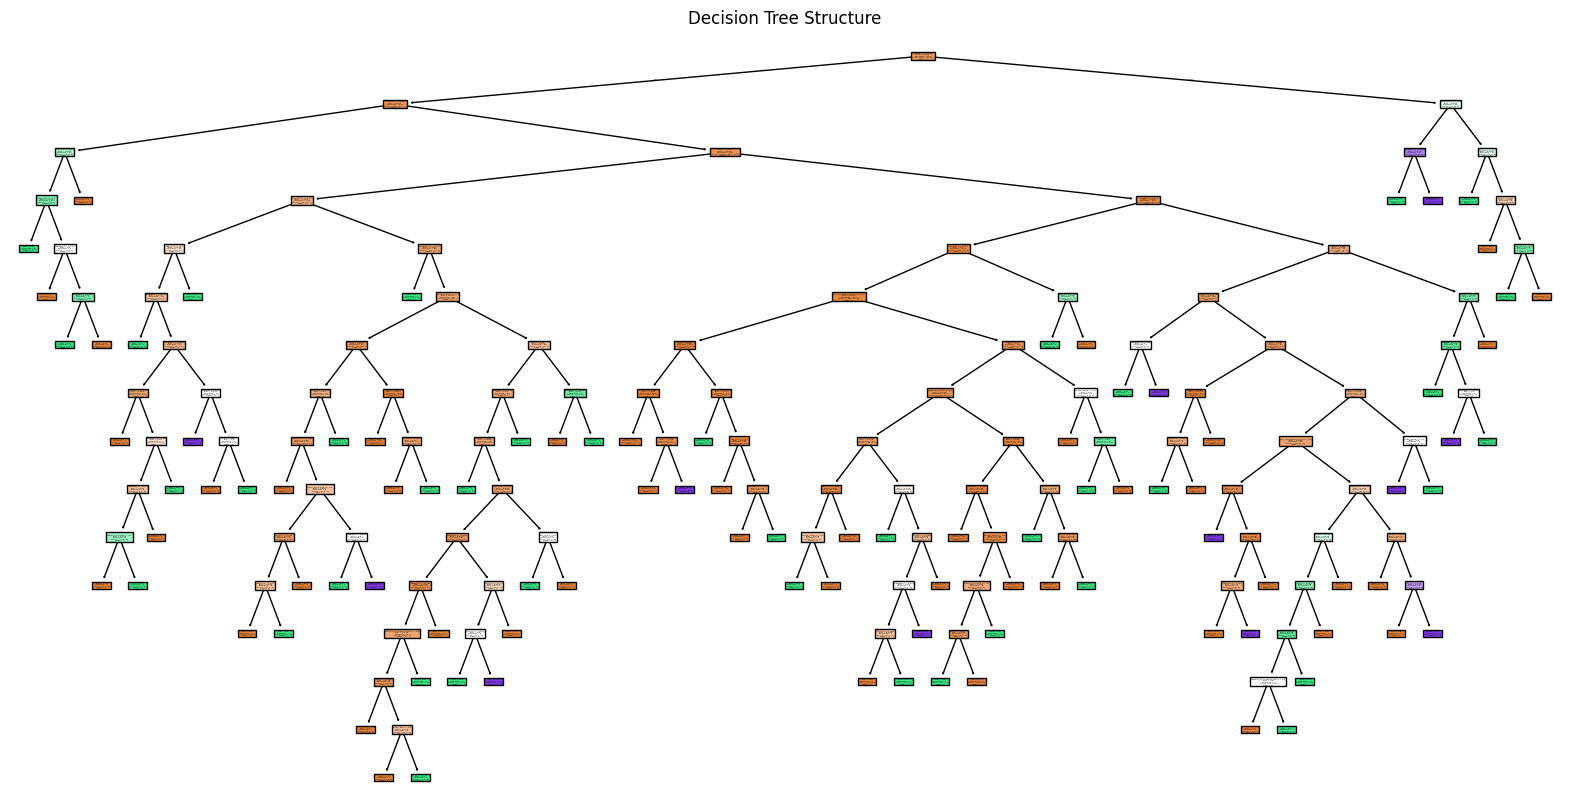

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns.tolist(), filled=True, class_names=[str(i) for i in np.unique(y)])
plt.title("Decision Tree Structure")
plt.show()

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree Classifier (ensure it's fitted before prediction)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Regenerate predictions on the test set from the 0.2 split
y_pred = dt_model.predict(X_test)

print("Decision Tree Model Performance on Test Set:")
print(f"Average Test Accuracy (Cross-Validation): {np.mean(test_accuracy):.2f}")
print(f"Average Test Log Loss (Cross-Validation): {np.mean(test_loss):.2f}")
print(f"Macro Average ROC AUC: {macro_roc_auc:.2f}") # Assuming macro_roc_auc is from the single split

print("\nClassification Report on Test Set (Single Split):")
print(classification_report(y_test, y_pred)) # Using y_test and y_pred from the single split

print("\nConfusion Matrix on Test Set (Single Split):")
display(confusion_matrix(y_test, y_pred)) # Using y_test and y_pred from the single split

Decision Tree Model Performance on Test Set:
Average Test Accuracy (Cross-Validation): 0.82
Average Test Log Loss (Cross-Validation): 3.71
Macro Average ROC AUC: 0.87

Classification Report on Test Set (Single Split):
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       232
           1       0.27      0.38      0.32        32
           2       0.00      0.00      0.00         9

    accuracy                           0.74       273
   macro avg       0.39      0.40      0.39       273
weighted avg       0.79      0.74      0.76       273


Confusion Matrix on Test Set (Single Split):


array([[190,  29,  13],
       [ 17,  12,   3],
       [  6,   3,   0]])